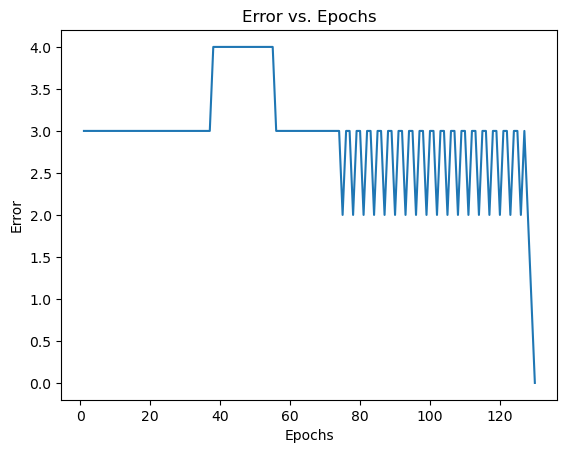

Final Weights:
W0: -0.10000000000000765
W1: 0.1000000000000001
W2: 0.05000000000000032


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize weights and parameters
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
max_epochs = 1000
convergence_error = 0.002
error_values = []

# Define AND gate training data
A = [0, 0, 1, 1]
B = [0, 1, 0, 1]
Z = [0, 0, 0, 1]

# Step activation function
def step_function(x):
    if x >= 0:
        return 1
    else:
        return 0

# Training loop
for epoch in range(max_epochs):
    SSE = 0  # Sum of squared errors for this epoch
    for i in range(len(A)):
        weighted_sum = W0 + W1 * A[i] + W2 * B[i]
        output = step_function(weighted_sum)
        error = Z[i] - output
        W0 += learning_rate * error
        W1 += learning_rate * error * A[i]
        W2 += learning_rate * error * B[i]
        SSE += error ** 2
    error_values.append(SSE)
    if SSE <= convergence_error:
        break

# Plot epochs vs. error values
plt.plot(range(1, epoch + 2), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.show()

# Print final weights
print("Final Weights:")
print("W0:", W0)
print("W1:", W1)
print("W2:", W2)


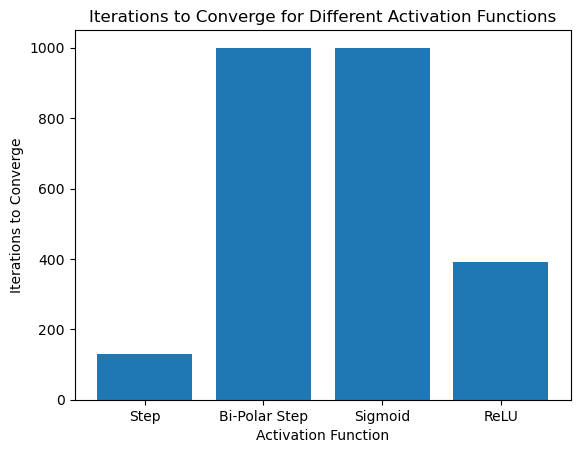

In [17]:
import matplotlib.pyplot as plt
import math

# Initialize weights and parameters (same as A1)
initial_W0 = 10
initial_W1 = 0.2
initial_W2 = -0.75
learning_rate = 0.05
max_epochs = 1000
convergence_error = 0.002
error_values = []

# Define AND gate training data (same as A1)
A = [0, 0, 1, 1]
B = [0, 1, 0, 1]
Z = [0, 0, 0, 1]

# Activation functions
def step_function(x):
    if x >= 0:
        return 1
    else:
        return 0

def bipolar_step_function(x):
    if x >= 0:
        return 1
    else:
        return -1

def sigmoid_function(x):
    return 1 / (1 + math.exp(-x))

def relu_function(x):
    return max(0, x)

# Function to train and return the number of iterations needed for convergence
def train_perceptron(activation_function, initial_W0, initial_W1, initial_W2):
    W0 = initial_W0
    W1 = initial_W1
    W2 = initial_W2
    iterations = 0
    for epoch in range(max_epochs):
        SSE = 0
        for i in range(len(A)):
            weighted_sum = W0 + W1 * A[i] + W2 * B[i]
            output = activation_function(weighted_sum)
            error = Z[i] - output
            W0 += learning_rate * error
            W1 += learning_rate * error * A[i]
            W2 += learning_rate * error * B[i]
            SSE += error ** 2
        iterations += 1
        if SSE <= convergence_error:
            break
    return iterations

# Experiment with different activation functions
activation_functions = [step_function, bipolar_step_function, sigmoid_function, relu_function]
activation_labels = ["Step", "Bi-Polar Step", "Sigmoid", "ReLU"]
convergence_iterations = []

for activation_function in activation_functions:
    iterations = train_perceptron(activation_function, initial_W0, initial_W1, initial_W2)
    convergence_iterations.append(iterations)

# Plot convergence iterations for each activation function
plt.bar(activation_labels, convergence_iterations)
plt.xlabel('Activation Function')
plt.ylabel('Iterations to Converge')
plt.title('Iterations to Converge for Different Activation Functions')
plt.show()


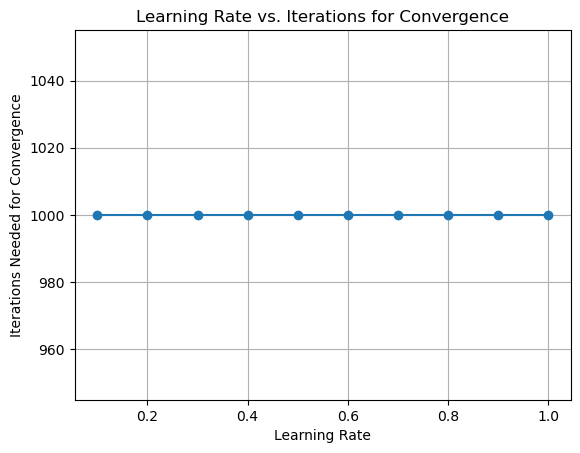

Learning Rate 0.1: Iterations Needed = 1000
Learning Rate 0.2: Iterations Needed = 1000
Learning Rate 0.3: Iterations Needed = 1000
Learning Rate 0.4: Iterations Needed = 1000
Learning Rate 0.5: Iterations Needed = 1000
Learning Rate 0.6: Iterations Needed = 1000
Learning Rate 0.7: Iterations Needed = 1000
Learning Rate 0.8: Iterations Needed = 1000
Learning Rate 0.9: Iterations Needed = 1000
Learning Rate 1: Iterations Needed = 1000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate input 
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# AND gate output 
y = np.array([0, 0, 0, 1])

#  weights and bias
W0, W1, W2 = 10, 0.2, -0.75

#  Bi-Polar Step activation function
def bipolar_step_activation(z):
    return 1 if z > 0 else -1

# List of learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

#  a list to store the number of iterations for each learning rate
iterations_needed = []

for learning_rate in learning_rates:
    W0, W1, W2 = 10, 0.2, -0.75
    
    #  variables for tracking epochs and errors
    epochs = 0
    
    while True:
        error_sum = 0
        for i in range(len(X)):
            xi = X[i]
            target = y[i]
            
            #  weighted sum
            z = W0 + W1 * xi[0] + W2 * xi[1]
            
            #  predicted output
            predicted = bipolar_step_activation(z)
            
            #  error
            error = target - predicted
            error_sum += error ** 2
            
            #  weights and bias
            W0 += learning_rate * error
            W1 += learning_rate * error * xi[0]
            W2 += learning_rate * error * xi[1]
        
        epochs += 1
        
        # Check for convergence condition or maximum epochs
        if error_sum <= 0.002 or epochs >= 1000:
            break
    
    iterations_needed.append(epochs)

# Plot learning rates vs. iterations needed
plt.plot(learning_rates, iterations_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations Needed for Convergence')
plt.title('Learning Rate vs. Iterations for Convergence')
plt.grid(True)
plt.show()

# Print the number of iterations needed for each learning rate
for i, rate in enumerate(learning_rates):
    print(f"Learning Rate {rate}: Iterations Needed = {iterations_needed[i]}")


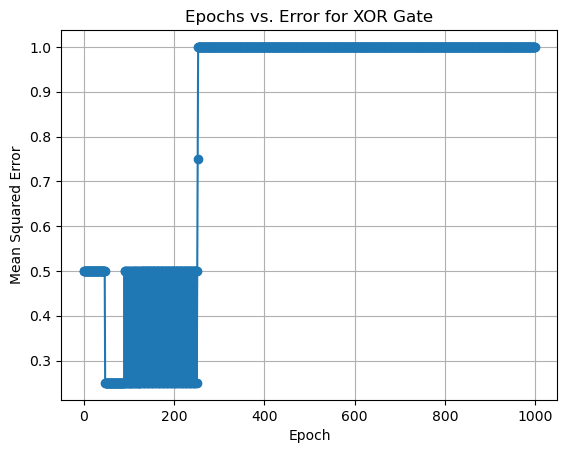

Converged Weights:
W0 = 0.09999999999999236
W1 = -0.09999999999999969
W2 = -0.09999999999999969


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input 
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR gate output 
y_xor = np.array([0, 1, 1, 0])

#  weights and bias
W0, W1, W2 = 10, 0.2, -0.75
alpha = 0.05

# Max number of epochs
max_epochs = 1000

# Lists to store epoch and error values
epochs = []
errors = []

for epoch in range(max_epochs):
    error_sum = 0.0
    for i in range(len(X_xor)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * X_xor[i][0] + W2 * X_xor[i][1]
        
        # Apply Step activation function
        if weighted_sum > 0:
            prediction = 1
        else:
            prediction = 0
        
        error = y_xor[i] - prediction
        
        # Update weights and bias
        W0 += alpha * error
        W1 += alpha * error * X_xor[i][0]
        W2 += alpha * error * X_xor[i][1]
        
        # Add squared error to the sum
        error_sum += error ** 2
    
    # Append epoch and error values for plotting
    epochs.append(epoch)
    errors.append(error_sum / len(X_xor))
    
    # Check for convergence
    if error_sum / len(X_xor) <= 0.002:
        break

# Plot epochs against error values
plt.plot(epochs, errors, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs. Error for XOR Gate')
plt.grid(True)
plt.show()

# Print the converged weights
print("Converged Weights:")
print("W0 =", W0)
print("W1 =", W1)
print("W2 =", W2)

Bi-Polar Step Activation Converged in 1000 epochs


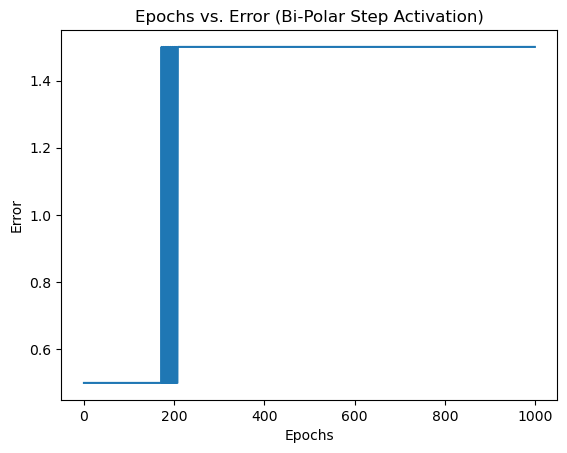

Converged Weights:
W0 = 0.1999999999999919
W1 = -0.09999999999999969
W2 = -0.15000000000000013


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR gate output data
y_xor = np.array([0, 1, 1, 0])

# Initialize weights and bias
W0, W1, W2 = 10, 0.2, -0.75

# Learning rate
alpha = 0.05

# Maximum number of epochs
max_epochs = 1000

# Lists to store epoch and error values
epochs = []
errors = []

for epoch in range(max_epochs):
    error_sum = 0.0
    for i in range(len(X_xor)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * X_xor[i][0] + W2 * X_xor[i][1]
        
        # Apply Bi-Polar Step activation function
        if weighted_sum > 0:
            prediction = 1
        else:
            prediction = -1
        
        # Calculate error
        error = y_xor[i] - prediction
        
        # Update weights and bias
        W0 += alpha * error
        W1 += alpha * error * X_xor[i][0]
        W2 += alpha * error * X_xor[i][1]
        
        # Add squared error to the sum
        error_sum += error ** 2
    
    # Append epoch and error values for plotting
    epochs.append(epoch)
    errors.append(error_sum / len(X_xor))
    
    # Check for convergence
    if error_sum / len(X_xor) <= 0.002:
        break

# Print the number of epochs needed for convergence
print("Bi-Polar Step Activation Converged in", epoch + 1, "epochs")

# Plot epochs against error values
plt.plot(epochs, errors)
plt.title('Epochs vs. Error (Bi-Polar Step Activation)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Print the converged weights
print("Converged Weights:")
print("W0 =", W0)
print("W1 =", W1)
print("W2 =", W2)

Sigmoid Activation Converged in 1000 epochs


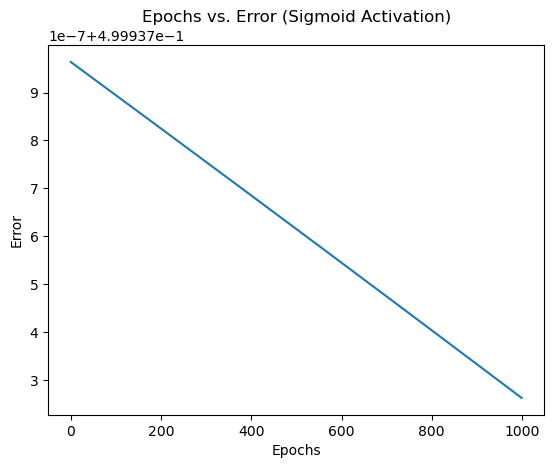

Converged Weights:
W0 = 9.993762331593638
W1 = 0.19603862458869564
W2 = -0.753960978725144


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR gate output data
y_xor = np.array([0, 1, 1, 0])

# Initialize weights and bias
W0, W1, W2 = 10, 0.2, -0.75

# Learning rate
alpha = 0.05

# Maximum number of epochs
max_epochs = 1000

# Lists to store epoch and error values
epochs = []
errors = []

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

for epoch in range(max_epochs):
    error_sum = 0.0
    for i in range(len(X_xor)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * X_xor[i][0] + W2 * X_xor[i][1]
        
        # Apply Sigmoid activation function
        prediction = sigmoid(weighted_sum)
        
        # Calculate error
        error = y_xor[i] - prediction
        
        # Update weights and bias
        delta = alpha * error * prediction * (1 - prediction)
        W0 += delta
        W1 += delta * X_xor[i][0]
        W2 += delta * X_xor[i][1]
        
        # Add squared error to the sum
        error_sum += error ** 2
    
    # Append epoch and error values for plotting
    epochs.append(epoch)
    errors.append(error_sum / len(X_xor))
    
    # Check for convergence
    if error_sum / len(X_xor) <= 0.002:
        break

# Print the number of epochs needed for convergence
print("Sigmoid Activation Converged in", epoch + 1, "epochs")

# Plot epochs against error values
plt.plot(epochs, errors)
plt.title('Epochs vs. Error (Sigmoid Activation)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Print the converged weights
print("Converged Weights:")
print("W0 =", W0)
print("W1 =", W1)
print("W2 =", W2)

ReLU Activation Converged in 1000 epochs


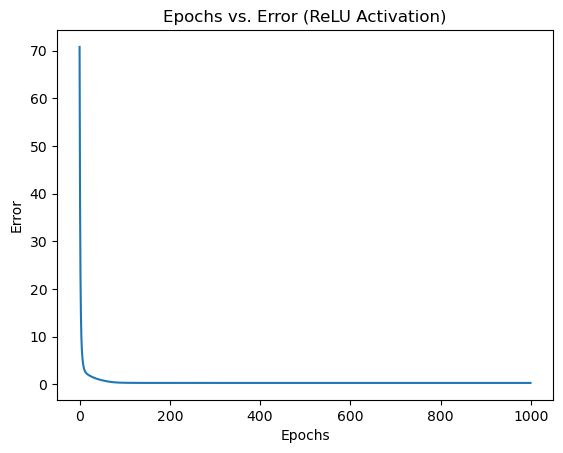

Converged Weights:
W0 = 0.526315789473727
W1 = -0.052631578947401975
W2 = -0.02631578947371866


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR gate output data
y_xor = np.array([0, 1, 1, 0])

# Initialize weights and bias
W0, W1, W2 = 10, 0.2, -0.75

# Learning rate
alpha = 0.05

# Maximum number of epochs
max_epochs = 1000

# Lists to store epoch and error values
epochs = []
errors = []

# ReLU activation function
def relu(x):
    return max(0, x)

for epoch in range(max_epochs):
    error_sum = 0.0
    for i in range(len(X_xor)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * X_xor[i][0] + W2 * X_xor[i][1]
        
        # Apply ReLU activation function
        prediction = relu(weighted_sum)
        
        # Calculate error
        error = y_xor[i] - prediction
        
        # Update weights and bias
        delta = alpha * error
        W0 += delta
        W1 += delta * X_xor[i][0]
        W2 += delta * X_xor[i][1]
        
        # Add squared error to the sum
        error_sum += error ** 2
    
    # Append epoch and error values for plotting
    epochs.append(epoch)
    errors.append(error_sum / len(X_xor))
    
    # Check for convergence
    if error_sum / len(X_xor) <= 0.002:
        break

# Print the number of epochs needed for convergence
print("ReLU Activation Converged in", epoch + 1, "epochs")

# Plot epochs against error values
plt.plot(epochs, errors)
plt.title('Epochs vs. Error (ReLU Activation)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Print the converged weights
print("Converged Weights:")
print("W0 =", W0)
print("W1 =", W1)
print("W2 =", W2)

ReLU Activation Converged in 1000 epochs


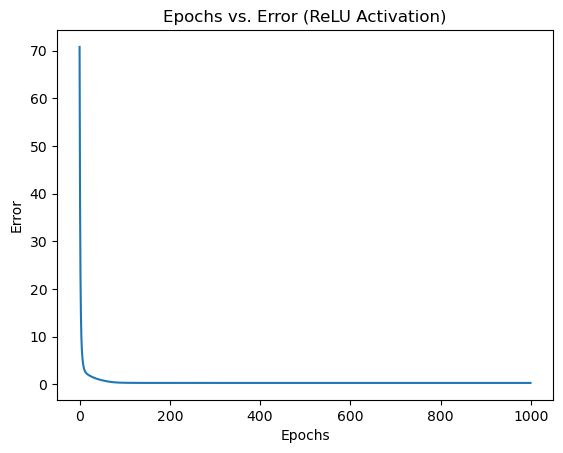

Converged Weights:
W0 = 0.526315789473727
W1 = -0.052631578947401975
W2 = -0.02631578947371866


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR gate output data
y_xor = np.array([0, 1, 1, 0])

# Initialize weights and bias
W0, W1, W2 = 10, 0.2, -0.75

# Learning rate
alpha = 0.05

# Maximum number of epochs
max_epochs = 1000

# Lists to store epoch and error values
epochs = []
errors = []

# ReLU activation function
def relu(x):
    return max(0, x)

for epoch in range(max_epochs):
    error_sum = 0.0
    for i in range(len(X_xor)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * X_xor[i][0] + W2 * X_xor[i][1]
        
        # Apply ReLU activation function
        prediction = relu(weighted_sum)
        
        # Calculate error
        error = y_xor[i] - prediction
        
        # Update weights and bias
        delta = alpha * error
        W0 += delta
        W1 += delta * X_xor[i][0]
        W2 += delta * X_xor[i][1]
        
        # Add squared error to the sum
        error_sum += error ** 2
    
    # Append epoch and error values for plotting
    epochs.append(epoch)
    errors.append(error_sum / len(X_xor))
    
    # Check for convergence
    if error_sum / len(X_xor) <= 0.002:
        break

# Print the number of epochs needed for convergence
print("ReLU Activation Converged in", epoch + 1, "epochs")

# Plot epochs against error values
plt.plot(epochs, errors)
plt.title('Epochs vs. Error (ReLU Activation)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Print the converged weights
print("Converged Weights:")
print("W0 =", W0)
print("W1 =", W1)
print("W2 =", W2)

In [7]:
import numpy as np

# Initialize weights and bias with random values
W_candies, W_mangoes, W_milk_packets, bias = np.random.rand(4)

# Learning rate
alpha = 0.1

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Input features (Candies, Mangoes, Milk Packets)
X = np.array([
    [20, 6, 1],
    [16, 3, 2],
    [27, 9, 3],
    [19, 11, 0],
    [24, 8, 2],
    [15, 12, 1],
    [15, 4, 2],
    [18, 8, 2],
    [21, 1, 4],
    [24, 19, 8]
])

# Corresponding target labels (High Value Tx)
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Training the perceptron
for _ in range(1000):  # Adjust the number of epochs as needed
    total_error = 0
    for i in range(len(X)):
        # Compute the weighted sum of inputs
        weighted_sum = (
            W_candies * X[i][0] +
            W_mangoes * X[i][1] +
            W_milk_packets * X[i][2] +
            bias
        )
        
        # Apply sigmoid activation function
        prediction = sigmoid(weighted_sum)
        
        # Calculate the error
        error = y[i] - prediction
        total_error += error ** 2
        
        # Update weights and bias
        W_candies += alpha * error * prediction * (1 - prediction) * X[i][0]
        W_mangoes += alpha * error * prediction * (1 - prediction) * X[i][1]
        W_milk_packets += alpha * error * prediction * (1 - prediction) * X[i][2]
        bias += alpha * error
    
    # Check for convergence (adjust the error threshold as needed)
    if total_error < 0.01:
        break

# Classify new data point
def classify(candies, mangoes, milk_packets):
    weighted_sum = (
        W_candies * candies +
        W_mangoes * mangoes +
        W_milk_packets * milk_packets +
        bias
    )
    prediction = sigmoid(weighted_sum)
    return "High Value" if prediction >= 0.5 else "Low Value"

# Example 
new_transaction = [18, 7, 3]
result = classify(*new_transaction)
print(f"New transaction {new_transaction} is classified as {result}")


New transaction [18, 7, 3] is classified as High Value


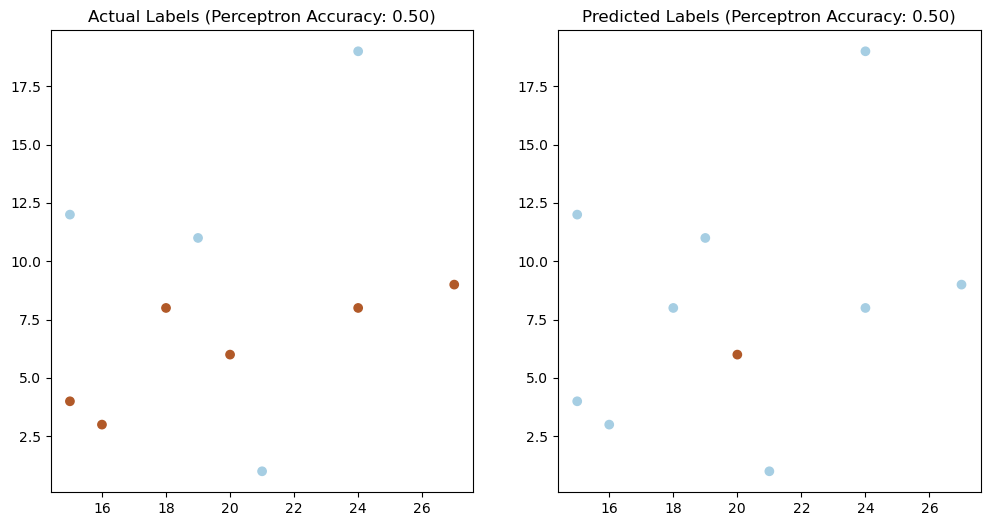

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Input features (Candies, Mangoes, Milk Packets)
X = np.array([
    [20, 6, 1],
    [16, 3, 2],
    [27, 9, 3],
    [19, 11, 0],
    [24, 8, 2],
    [15, 12, 1],
    [15, 4, 2],
    [18, 8, 2],
    [21, 1, 4],
    [24, 19, 8]
])

# Corresponding target labels (High Value Tx)
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Create and train a perceptron model
class Perceptron:
    def __init__(self, learning_rate=0.05, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.step_function(linear_output)

                # Update weights and bias
                self.weights += self.learning_rate * (y[i] - prediction) * X[i]
                self.bias += self.learning_rate * (y[i] - prediction)

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            linear_output = np.dot(X[i], self.weights) + self.bias
            predictions.append(self.step_function(linear_output))
        return np.array(predictions)

perceptron = Perceptron()
perceptron.fit(X, y)

# Create and train a logistic regression model
logistic_regression = LogisticRegression(solver='lbfgs')
logistic_regression.fit(X, y)

# Generate predictions for each transaction
perceptron_predictions = perceptron.predict(X)
logistic_regression_predictions = logistic_regression.predict(X)

# Calculate accuracy for both models
perceptron_accuracy = accuracy_score(y, perceptron_predictions)
logistic_regression_accuracy = accuracy_score(y, logistic_regression_predictions)

# Plot transactions with actual and predicted labels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title(f'Actual Labels (Perceptron Accuracy: {perceptron_accuracy:.2f})')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=perceptron_predictions, cmap=plt.cm.Paired)
plt.title(f'Predicted Labels (Perceptron Accuracy: {perceptron_accuracy:.2f})')

plt.show()

In [9]:
import numpy as np

# AND gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# AND gate output data
y = np.array([0, 0, 0, 1])

# Initialize weights and biases
np.random.seed(0)
input_size = 2
hidden_size = 2
output_size = 1

# Weights and biases for the input layer to the hidden layer
W1 = np.random.uniform(size=(input_size, hidden_size))
b1 = np.zeros(hidden_size)

# Weights and biases for the hidden layer to the output layer
W2 = np.random.uniform(size=(hidden_size, output_size))
b2 = np.zeros(output_size)

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Hyperparameters
learning_rate = 0.05
max_iterations = 1000
convergence_error = 0.002

# Training the neural network
for i in range(max_iterations):
    # Forward propagation
    layer1_input = np.dot(X, W1) + b1
    layer1_output = sigmoid(layer1_input)

    layer2_input = np.dot(layer1_output, W2) + b2
    layer2_output = sigmoid(layer2_input)

    # Calculate error
    error = y.reshape(-1, 1) - layer2_output

    # Backpropagation
    delta2 = error * sigmoid_derivative(layer2_output)
    dW2 = np.dot(layer1_output.T, delta2)
    db2 = np.sum(delta2, axis=0)

    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(layer1_output)
    dW1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0)

    # Update weights and biases
    W2 += learning_rate * dW2
    b2 += learning_rate * db2
    W1 += learning_rate * dW1
    b1 += learning_rate * db1

    # Calculate mean squared error
    mse = np.mean(np.square(error))

    # Check for convergence
    if mse <= convergence_error:
        print(f"Converged after {i + 1} iterations with MSE: {mse:.6f}")
        break

# Testing the trained neural network
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output = sigmoid(np.dot(sigmoid(np.dot(test_data, W1) + b1), W2) + b2)
predicted_labels = (predicted_output > 0.5).astype(int)

print("Test Data:")
print(test_data)
print("Predicted Labels:")
print(predicted_labels)


Test Data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicted Labels:
[[0]
 [0]
 [0]
 [0]]


In [10]:
import numpy as np

# XOR gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# XOR gate output data
y = np.array([[0], [1], [1], [0]])

# Hyperparameters
learning_rate = 0.05
input_size = 2
hidden_size = 2
output_size = 1
max_iterations = 10000
convergence_error = 0.002

# Initialize weights with small random values
np.random.seed(0)
W1 = 2 * np.random.random((input_size, hidden_size)) - 1
W2 = 2 * np.random.random((hidden_size, output_size)) - 1

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training the neural network using backpropagation
for i in range(max_iterations):
    # Forward propagation
    layer1_input = np.dot(X, W1)
    layer1_output = sigmoid(layer1_input)

    layer2_input = np.dot(layer1_output, W2)
    layer2_output = sigmoid(layer2_input)

    # Calculate errors
    error2 = y - layer2_output
    error2_delta = error2 * sigmoid_derivative(layer2_output)

    error1 = error2_delta.dot(W2.T)
    error1_delta = error1 * sigmoid_derivative(layer1_output)

    # Update weights
    W2 += layer1_output.T.dot(error2_delta) * learning_rate
    W1 += X.T.dot(error1_delta) * learning_rate

    # Calculate mean squared error
    mse = np.mean(np.square(error2))

    # Check for convergence
    if mse <= convergence_error:
        print(f"Converged after {i + 1} iterations with MSE: {mse:.6f}")
        break

# Testing the trained neural network
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output = sigmoid(np.dot(sigmoid(np.dot(test_data, W1)), W2))
predicted_labels = (predicted_output > 0.5).astype(int)

print("Test Data:")
print(test_data)
print("Predicted Labels:")
print(predicted_labels)


Test Data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicted Labels:
[[0]
 [0]
 [1]
 [1]]


In [11]:
import numpy as np

# XOR gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# XOR gate output data (two nodes for each output)
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

# Hyperparameters
learning_rate = 0.05
input_size = 2
hidden_size = 2
output_size = 2  # Two output nodes
max_iterations = 10000
convergence_error = 0.002

# Initialize weights with small random values
np.random.seed(0)
W1 = 2 * np.random.random((input_size, hidden_size)) - 1
W2 = 2 * np.random.random((hidden_size, output_size)) - 1

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training the neural network using backpropagation
for i in range(max_iterations):
    # Forward propagation
    layer1_input = np.dot(X, W1)
    layer1_output = sigmoid(layer1_input)

    layer2_input = np.dot(layer1_output, W2)
    layer2_output = sigmoid(layer2_input)

    # Calculate errors
    error2 = y - layer2_output
    error2_delta = error2 * sigmoid_derivative(layer2_output)

    error1 = error2_delta.dot(W2.T)
    error1_delta = error1 * sigmoid_derivative(layer1_output)

    # Update weights
    W2 += layer1_output.T.dot(error2_delta) * learning_rate
    W1 += X.T.dot(error1_delta) * learning_rate

    # Calculate mean squared error
    mse = np.mean(np.square(error2))

    # Check for convergence
    if mse <= convergence_error:
        print(f"Converged after {i + 1} iterations with MSE: {mse:.6f}")
        break

# Testing the trained neural network
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output = sigmoid(np.dot(sigmoid(np.dot(test_data, W1)), W2))
predicted_labels = (predicted_output > 0.5).astype(int)

print("Test Data:")
print(test_data)
print("Predicted Labels:")
print(predicted_labels)


Test Data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicted Labels:
[[0 0]
 [0 0]
 [0 1]
 [0 1]]


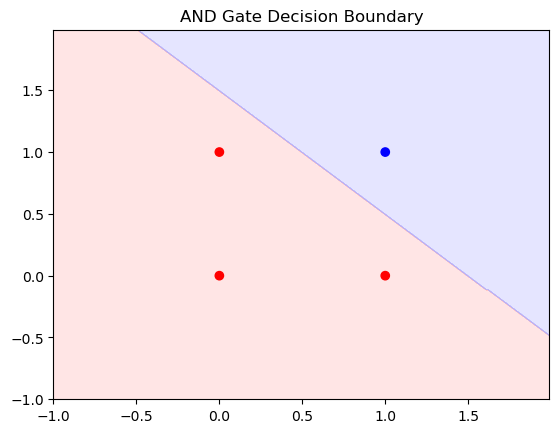

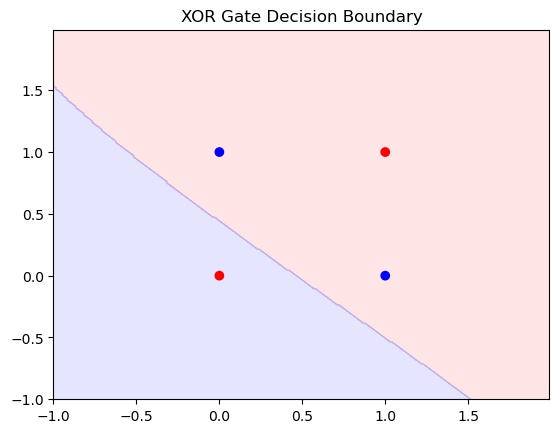

AND Gate Accuracy: 1.0
XOR Gate Accuracy: 0.25


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Define the AND gate input and output data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Define the XOR gate input and output data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create an MLPClassifier for the AND gate
and_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.1, max_iter=10000)

# Create an MLPClassifier for the XOR gate
xor_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.1, max_iter=10000)

# Train the AND gate classifier
and_classifier.fit(X_and, y_and)

# Train the XOR gate classifier
xor_classifier.fit(X_xor, y_xor)

# Predict for AND gate inputs
and_predictions = and_classifier.predict(X_and)

# Predict for XOR gate inputs
xor_predictions = xor_classifier.predict(X_xor)

# Confusion matrix for AND gate
cm_and = confusion_matrix(y_and, and_predictions)

# Confusion matrix for XOR gate
cm_xor = confusion_matrix(y_xor, xor_predictions)

# Define a function to plot the decision boundary
def plot_decision_boundary(classifier, X, y, title):
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundary for AND gate
plot_decision_boundary(and_classifier, X_and, y_and, "AND Gate Decision Boundary")

# Plot decision boundary for XOR gate
plot_decision_boundary(xor_classifier, X_xor, y_xor, "XOR Gate Decision Boundary")

# Calculate accuracy for AND and XOR gates
accuracy_and = accuracy_score(y_and, and_predictions)
accuracy_xor = accuracy_score(y_xor, xor_predictions)

print("AND Gate Accuracy:", accuracy_and)
print("XOR Gate Accuracy:", accuracy_xor)
